Представим, что у нас есть небольшой онлайн-кинотеатр и мы хотим, чтобы пользователи были довольны и смотрели фильмы у нас, а не на других ресурсах. Создадим небольшую матрицу рейтингов наших фильмов, на основании оценок пользователей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Названия фильмов
f = ['Терминатор', 'Робокоп', 'Рэмбо', 'Джеймс Бонд','Властелин Колец', 'Хоббит', 'Гарри Поттер', 
     'Американский Пирог', 'Мальчишник в Вегасе', 'Мстители', 'Супермен'] 

In [3]:
#Наши пользователи
u = ['Вася','Петя','Саша','Женя','Маша','Оля','Лена','Ваня','Ира']

In [4]:
#Рейтинг фильмов от пользователей. 0 - значит фильм не был просмотрен.
fu = np.array([[9,0,0,6,4,3,5,7,8,6,5],
              [0,0,0,8,10,0,8,5,6,2,0],
              [8,0,5,7,4,0,5,7,8,8,5],
              [5,2,0,4,10,0,9,5,0,0,0],
              [0,0,2,5,7,0,0,9,0,4,0],
              [2,3,0,0,0,7,9,0,5,0,3],
              [5,0,3,8,8,0,0,7,0,2,4],
              [8,7,0,6,5,4,0,8,0,10,0],
              [0,0,2,5,10,0,0,0,9,0,3]])

In [5]:
#Сделаем датафрейм из f,u и fu.
R = pd.DataFrame(fu,u,f)

In [6]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


Вот теперь и встаёт вопрос, какой предложить фильм, чтобы наш пользователь хорошо провёл вечер? Немного поискав на просторах интернета, находим статью о том, что один большой онлнайн-кинотеатр **Netflix** в 2006 году объявил соревнование по разработке рекомендательной системы фильмов. За решение, которое улучшит качество рекомендаций на 10%, была объявлена награда в 1 млн долларов. В итоге в 2011 году такое решение было получено, а работало оно на основе **SVD** - Singular Value Decomposition.

In [7]:
def SVD(R,d,step,lambda_reg,n_iters):
    #инициализуем наши матрицы для разложения
    U = np.zeros((R.shape[0],d))
    V = np.zeros((d,R.shape[1]))
    #начальные элементы матрица U и V будут средним рейтингом по ненулевым оценкам
    mu = R.sum()/(R!=0).sum()
    non_zero = (R!=0).sum()
    print("Non zero : ", non_zero)
    U = U + mu
    V = V + mu
    # Создадим списки, где будут индексы нулевых и ненулевых элементов матрицы R
    indx=[]
    zero_indx = []
    # Инициализируем MSE в начале и будем отслеживать в процессе обучения
    MSE_start = 0
    MSE=[]
    # Найдём индексы нулевых и ненулевых элементов
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i][j]>0:
                indx.append([i,j])
                MSE_start+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2) / non_zero
            else:
                zero_indx.append([i,j])
    # Сделаем градиентный спуск            
    for n in range(n_iters):
        choice = np.random.randint(0,len(indx))
        ij = indx[choice]
        for k in range(0,d):
            U[ij[0],k] = U[ij[0],k] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * V[k,ij[1]] - 
                                              lambda_reg * U[ij[0],k])
            V[k,ij[1]] = V[k,ij[1]] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * U[ij[0],k] - 
                                              lambda_reg * V[k,ij[1]])
            
        L=0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i,j]>0:
                    L+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2)/non_zero
        MSE.append(L)    
    return U,V, MSE_start, MSE

In [8]:
A,B,M_1,M_end = SVD(R.values,2,0.01,0.1,3000)

Non zero :  60


In [9]:
R.values

array([[ 9,  0,  0,  6,  4,  3,  5,  7,  8,  6,  5],
       [ 0,  0,  0,  8, 10,  0,  8,  5,  6,  2,  0],
       [ 8,  0,  5,  7,  4,  0,  5,  7,  8,  8,  5],
       [ 5,  2,  0,  4, 10,  0,  9,  5,  0,  0,  0],
       [ 0,  0,  2,  5,  7,  0,  0,  9,  0,  4,  0],
       [ 2,  3,  0,  0,  0,  7,  9,  0,  5,  0,  3],
       [ 5,  0,  3,  8,  8,  0,  0,  7,  0,  2,  4],
       [ 8,  7,  0,  6,  5,  4,  0,  8,  0, 10,  0],
       [ 0,  0,  2,  5, 10,  0,  0,  0,  9,  0,  3]])

In [10]:
A@B

array([[6.17971218, 4.70990807, 4.08514162, 6.23534572, 7.06559497,
        4.79048475, 7.12755007, 6.84411095, 7.80324828, 5.6876097 ,
        4.81331265],
       [5.9396033 , 4.36661935, 3.72008133, 6.10658414, 6.79462963,
        4.35248154, 6.80657184, 6.76261091, 7.5599583 , 5.31623117,
        4.43836558],
       [5.75734655, 4.95826825, 4.54002567, 5.40533886, 6.57000207,
        5.35917184, 6.7970928 , 5.72019818, 7.05680666, 5.83393128,
        5.15294447],
       [4.60621408, 4.00131476, 3.67658132, 4.30021965, 5.25562094,
        4.34172196, 5.44752662, 4.53690181, 5.632999  , 4.69977152,
        4.16300092],
       [5.81950317, 3.17117311, 2.21965327, 6.76714312, 6.68185781,
        2.52472847, 6.3647339 , 7.89973152, 7.82084177, 4.16995289,
        3.05054764],
       [5.11526441, 5.37269246, 5.27899901, 4.11745184, 5.81577977,
        6.28162257, 6.30485966, 3.96920381, 5.90828577, 6.09095941,
        5.71247754],
       [5.18416468, 2.62434245, 1.71907085, 6.17041775, 5.

In [11]:
B

array([[3.31699191, 4.52799609, 4.76717519, 1.93059352, 3.74802627,
        5.71394393, 4.3752607 , 1.37254212, 3.44105107, 4.92928194,
        4.92837338],
       [3.84156949, 3.31002419, 3.03142353, 3.60553438, 4.38377466,
        3.57846102, 4.53578633, 3.81489896, 4.70801801, 3.89420623,
        3.44020351]])

In [12]:
r_cap = np.zeros((R.shape[0],R.shape[1]))
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        r_cap[i,j]=np.dot(A[i,:],B[:,j])

In [13]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


In [14]:
R_cap = pd.DataFrame(r_cap,u,f)

In [15]:
R_cap

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,6.179712,4.709908,4.085142,6.235346,7.065595,4.790485,7.127550,6.844111,7.803248,5.687610,4.813313
Петя,5.939603,4.366619,3.720081,6.106584,6.794630,4.352482,6.806572,6.762611,7.559958,5.316231,4.438366
Саша,5.757347,4.958268,4.540026,5.405339,6.570002,5.359172,6.797093,5.720198,7.056807,5.833931,5.152944
Женя,4.606214,4.001315,3.676581,4.300220,5.255621,4.341722,5.447527,4.536902,5.632999,4.699772,4.163001
Маша,5.819503,3.171173,2.219653,6.767143,6.681858,2.524728,6.364734,7.899732,7.820842,4.169953,3.050548
Оля,5.115264,5.372692,5.278999,4.117452,5.815780,6.281623,6.304860,3.969204,5.908286,6.090959,5.712478
Лена,5.184165,2.624342,1.719071,6.170418,5.956833,1.933844,5.614747,7.268116,7.041982,3.526470,2.482290
Ваня,7.080704,6.243409,5.770816,6.544781,8.076919,6.819571,8.399408,6.867660,8.624495,7.311365,6.507915
Ира,6.604709,4.282416,3.398823,7.196281,7.568224,3.939203,7.411272,8.179351,8.620705,5.373758,4.263357


In [16]:
print ('Start MSE:',M_1,'Finish MSE:',M_end[-1])

Start MSE: 4065.7950666666675 Finish MSE: 3.5566485815480497


In [17]:
print ('Start RMSE',np.sqrt(M_1),'Finish RMSE',np.sqrt(M_end[-1]))

Start RMSE 63.76358731020917 Finish RMSE 1.885907893177196


In [18]:
n = (R.values != 0).sum()

In [19]:
L=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R.values[i,j]>0:
            L+=((R.values[i,j]-R_cap.values[i,j]) ** 2)/n

In [20]:
n

60

В итоге получили матрицу оценок с помощью SGD. Как видно, MSE сильно упал. Можно поиграться с параметрами, чтобы настроить качество. Как итог, выбираем фильмы с наибольшей оценкой и рекомендуем их пользователям! :) 

Как подбирать d?

есть хорошая библиотека Surprise, где можно делать рекомендации проще, быстрее и различными способами.
Оставлю ссылку для ознакомления http://surpriselib.com/

В итоге получили матрицу оценок с помощью SGD. Как видно, MSE сильно упал. Можно поиграться с параметрами, чтобы настроить качество. Как итог, выбираем фильмы с наибольшей оценкой и рекомендуем их пользователям! :) 

на этих же игрушечных данных:

    1. Разобраться и применить truncated SVD из sklearn.decomposition
    2. Разобраться и применить SVD из surprise.
    3. Разобраться и применить svds из scipy.sparse

Сравнить результаты. Какие различия у этих алгоритмов? Как изменилась метрика? Почему? 

In [21]:
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd as SVD
from scipy.sparse.linalg import svds
import scipy.sparse as sparse
from surprise import SVD as SSVD
from surprise import Reader
from surprise import Dataset
from surprise import accuracy

1) Truncated SVD

In [22]:
#check of correctness of truncated svd
for N in range(1, min(R.shape)):
    tsvd = TruncatedSVD(N)
    tR = tsvd.fit_transform(R)
    tE = tsvd.singular_values_
    tV = tsvd.components_
    tU = tR.dot(np.linalg.inv(np.diag(tsvd.singular_values_)))
    U, E, V = SVD(R, full_matrices=False)
    U = U[:, :-(U.shape[1] - N)]
    E = E[:-(E.size - N)]
    V = V[:-(V.shape[0] - N), :]
    assert(np.allclose(U @ np.diag(E) @ V, tU @ np.diag(tE) @ tV))

In [23]:
RMSEs = []
for N in range(1, min(R.shape)):
    non_zero = (R != 0).sum().sum()
    tsvd = TruncatedSVD(N)
    tR = tsvd.fit_transform(R)
    E = tsvd.singular_values_
    V = tsvd.components_
    U = tR.dot(np.linalg.inv(np.diag(tsvd.singular_values_)))
    L=0
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R.iloc[i][j]>0:
                L+=np.sqrt(((R.iloc[i,j]-np.dot(U[i,:],V[:,j])) ** 2)) / non_zero
    RMSEs.append(L)

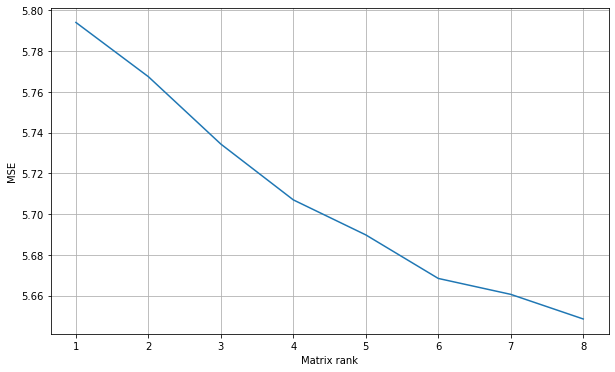

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(range(1, min(R.shape)), RMSEs)
ax.set_xlabel("Matrix rank")
ax.set_ylabel("MSE")
ax.grid()

2) Surprise SVD

In [25]:
k_factors = 8
algo = SSVD(n_factors= k_factors, n_epochs= 5, biased= True, lr_all= 0.005, reg_all= 0, init_mean= 0, init_std_dev= 0.01)

In [26]:
user_id = []
item_id = []
rating = []
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R.iloc[i, j] != 0:
            user_id.append(i)
            item_id.append(j)
            rating.append(R.iloc[i, j])
df = pd.DataFrame({
    'user_id': user_id,
    'item_id': item_id,
    'rating': rating
})

In [27]:
reader = Reader(rating_scale = (1, 10))
data = Dataset.load_from_df(df, reader)
train_data = data.build_full_trainset()

In [28]:
algo.fit(train_data)

In [29]:
data_trainset = train_data.build_testset()
train_pred = algo.test(data_trainset)
accuracy.rmse(train_pred)

RMSE: 2.2520


2.2519911183297583

3) SVDS

In [30]:
new_r = sparse.coo_matrix(R)
RMSEs = []
for N in range(1, min(R.shape)):
    non_zero = (R != 0).sum().sum()
    U, E, V = svds(new_r.asfptype(), N)
    L=0
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R.iloc[i][j]>0:
                L+=np.sqrt(((R.iloc[i,j]-np.dot(U[i,:],V[:,j])) ** 2)) / non_zero
    RMSEs.append(L)

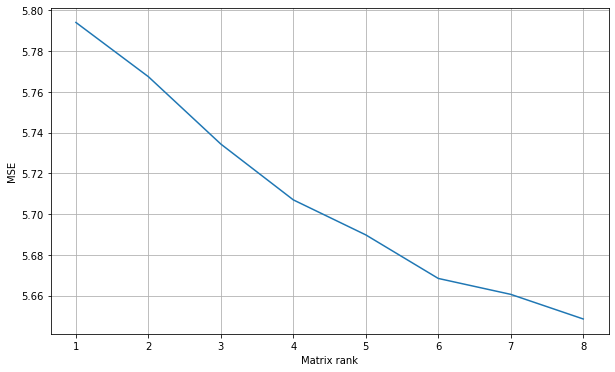

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(range(1, min(R.shape)), RMSEs)
ax.set_xlabel("Matrix rank")
ax.set_ylabel("MSE")
ax.grid()

Т.к. truncated svd является оберткой на svds, то результаты этих методов идентичны. Surprise svd показал лучший результат, т.к. анализирует скрытые переменные.